# Figure 2

## Imports and colour scheme

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


## Import plots

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


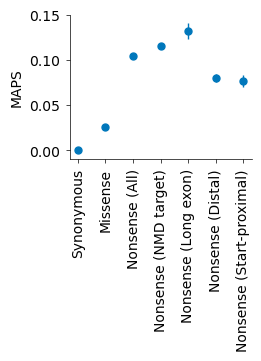

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


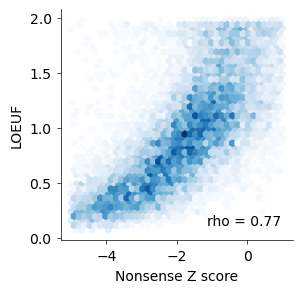

In [19]:
%run fig_2_maps_plot.ipynb
%run fig_2_z_loeuf_plot.ipynb

## Figure construction

In [5]:
cm = 1 / 2.54 # cm to inches convertes

In [10]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=10):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

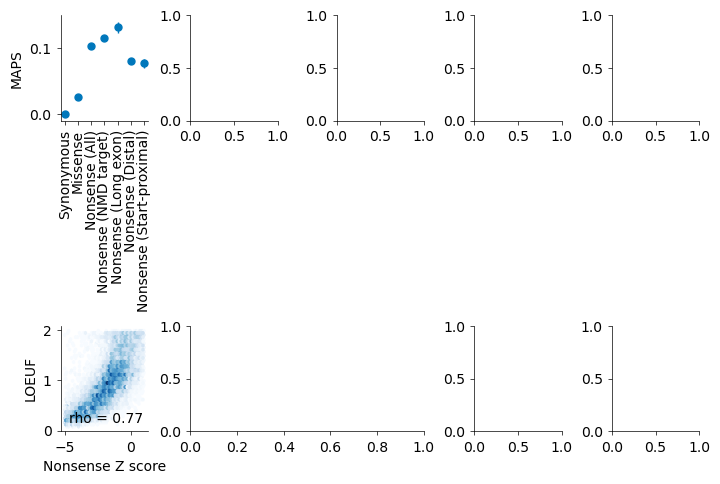

In [20]:
mosaic = """
ABBCC
DEECC
"""

fig = plt.figure(figsize = (18*cm, 12*cm), layout=("constrained"))

mosaic = [
    ["maps","oe_syn","oe_non","z_dist_nmd","z_dist_long"],
    ["z_loeuf","upset","upset","z_dist_distal","z_dist_start"],
]
axd = fig.subplot_mosaic(mosaic)

plot_maps(maps, axd["maps"])
plot_z_loeuf(z_loeuf, axd["z_loeuf"])